<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
# conda install -c conda-forge keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here
diabetes = load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
diabetes['data'].shape

(442, 10)

In [5]:
diabetes['target'].shape

(442,)

### Prepare input data

In [6]:
# insert code here
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Split the data (training/test)

In [7]:
# input
X = diabetes.data

In [8]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [9]:
y = diabetes.target

In [10]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [12]:
# insert code here
model = Sequential()

2022-02-10 20:41:18.267972: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
n_cols = len(X[0])

In [14]:
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'linear'))

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 6,660
Trainable params: 6,660
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [16]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['RootMeanSquaredError'])

### Fit the training data

In [17]:
%%time
# Fit the model
fitted_model = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100


2022-02-10 20:41:18.369323: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


12/12 [==============================] - 1s 35ms/step - loss: 27189.5368 - root_mean_squared_error: 164.8571 - val_loss: 30894.1699 - val_root_mean_squared_error: 175.7674
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 28005.6291 - root_mean_squared_error: 167.3388 - val_loss: 30860.0645 - val_root_mean_squared_error: 175.6703
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 28247.2405 - root_mean_squared_error: 168.0542 - val_loss: 30793.3906 - val_root_mean_squared_error: 175.4805
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 28137.4905 - root_mean_squared_error: 167.7340 - val_loss: 30665.2559 - val_root_mean_squared_error: 175.1150
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 25869.0231 - root_mean_squared_error: 160.7373 - val_loss: 30436.2441 - val_root_mean_squared_error: 174.4599
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 30329.5361 - root_mean_

12/12 [==============================] - 0s 3ms/step - loss: 3005.2368 - root_mean_squared_error: 54.8111 - val_loss: 3460.0205 - val_root_mean_squared_error: 58.8219
Epoch 47/100
12/12 [==============================] - 0s 3ms/step - loss: 3425.7125 - root_mean_squared_error: 58.4265 - val_loss: 3441.7280 - val_root_mean_squared_error: 58.6662
Epoch 48/100
12/12 [==============================] - 0s 3ms/step - loss: 3150.0914 - root_mean_squared_error: 56.1093 - val_loss: 3429.7661 - val_root_mean_squared_error: 58.5642
Epoch 49/100
12/12 [==============================] - 0s 3ms/step - loss: 3123.0386 - root_mean_squared_error: 55.8464 - val_loss: 3418.0588 - val_root_mean_squared_error: 58.4642
Epoch 50/100
12/12 [==============================] - 0s 3ms/step - loss: 2961.4022 - root_mean_squared_error: 54.3812 - val_loss: 3398.1924 - val_root_mean_squared_error: 58.2940
Epoch 51/100
12/12 [==============================] - 0s 3ms/step - loss: 3095.1373 - root_mean_squared_error: 55

12/12 [==============================] - 0s 3ms/step - loss: 2376.6995 - root_mean_squared_error: 48.6604 - val_loss: 3139.8782 - val_root_mean_squared_error: 56.0346
Epoch 92/100
12/12 [==============================] - 0s 3ms/step - loss: 2797.2107 - root_mean_squared_error: 52.8631 - val_loss: 3139.6030 - val_root_mean_squared_error: 56.0322
Epoch 93/100
12/12 [==============================] - 0s 3ms/step - loss: 2980.6630 - root_mean_squared_error: 54.4062 - val_loss: 3139.6316 - val_root_mean_squared_error: 56.0324
Epoch 94/100
12/12 [==============================] - 0s 3ms/step - loss: 2708.6810 - root_mean_squared_error: 52.0284 - val_loss: 3140.6992 - val_root_mean_squared_error: 56.0419
Epoch 95/100
12/12 [==============================] - 0s 3ms/step - loss: 3249.9281 - root_mean_squared_error: 56.6535 - val_loss: 3143.8215 - val_root_mean_squared_error: 56.0698
Epoch 96/100
12/12 [==============================] - 0s 3ms/step - loss: 2924.9397 - root_mean_squared_error: 54

### Create predictions

In [18]:
# insert code here
predictions = model.predict_classes(X_test)

/Users/anna_hj/opt/anaconda3/envs/IOD-deep-learning/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Evaluate the model

In [19]:
score = model.evaluate(X_test, y_test, batch_size = 315)

1/1 [==============================] - 0s 11ms/step - loss: 3317.5535 - root_mean_squared_error: 57.5982


### Visualisation of cost

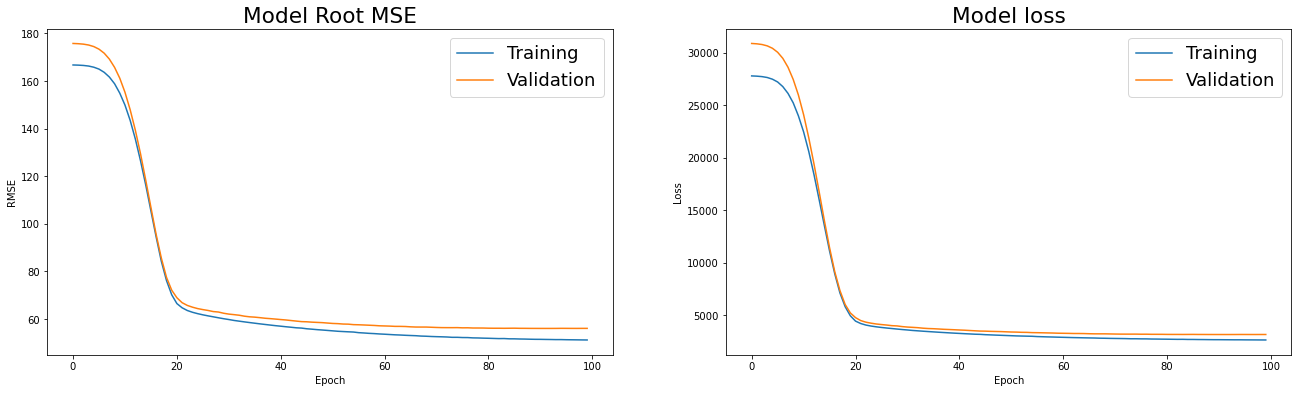

In [20]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(fitted_model.history['root_mean_squared_error'], label = 'Training')
ax[0].plot(fitted_model.history['val_root_mean_squared_error'], label = 'Validation')
ax[0].set_title('Model Root MSE')
ax[0].set_ylabel('RMSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(fitted_model.history['loss'], label = 'Training')
ax[1].plot(fitted_model.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

<AxesSubplot:>

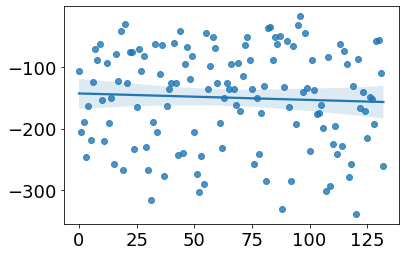

In [22]:
# insert code here
predictions = predictions.flatten()
resid = []
for pred, actual in zip(predictions,y_test):
    resid.append(pred-actual)
sns.regplot(x=np.arange(133),y=resid)

© 2020 Institute of Data